## Variations on Lotka-Volterra equations

https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations

In [463]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Pray <-> Predator Model

In [319]:
prey = 15
pred = 3
a = 0.8
b = 0.8
d = 0.5
g = 5.
step = 0.01
epochs = 5000

In [336]:
def update_prey(prey, pred): return prey + step * (prey * (a - b * pred))
def update_pred(prey, pred): return pred + step * (-pred * (g - d * prey))

def run_sim(pred, prey, epochs):
    prey_log = []
    pred_log = []
    for _ in range(epochs):
        prey_log.append(prey)
        pred_log.append(pred)
        nxt_prey = update_prey(prey, pred)
        nxt_pred = update_pred(prey, pred)
        prey = nxt_prey
        pred = nxt_pred
    return {"prey_log": prey_log, "pred_log": pred_log}

def plot_sim(x, y):
    plt.figure(figsize=(14, 6))
    
    # ts
    plt.subplot(121)
    plt.plot(x, label="prey")
    plt.plot(y, label="Predators")
    plt.legend(loc='upper right')
    
    # phase space
    plt.subplot(122)
    plt.plot(x, y)
    plt.xlabel("Prey N")
    plt.ylabel("Predators N")

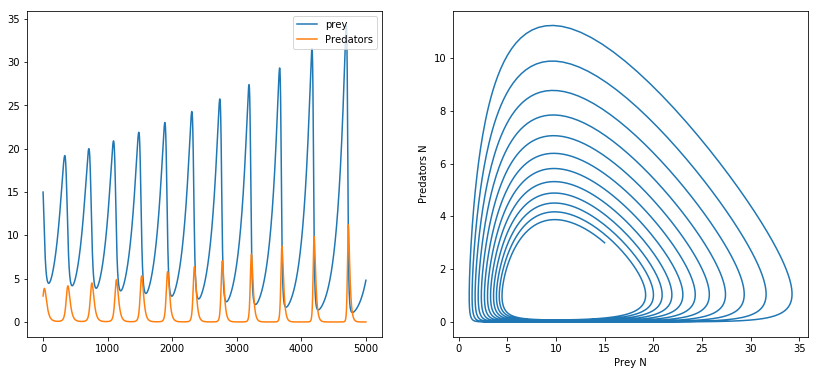

In [337]:
sim = run_sim(pred, prey, epochs)
plot_sim(sim.get("prey_log"), sim.get("pred_log"))

___

### Grass <-> Pray <-> Predator Model

Standard Lotka-Volterra assumes unlimited food supply for Pray and thus unlimited growth possibility. Let's try to tweak this assumption and see what happens.

In [419]:
grass = 30
i = 1
j = 0.1
h = 0.05
l = 1

In [424]:
def update_grass(grass, prey): return grass + step * (grass * (i - j * prey))
def update_prey(prey, pred):
    base = prey + step * (prey * (a - b * pred))
    if grass/prey > l:
        return base
    else:
        return base - h * base
    return 
def update_pred(prey, pred): return pred + step * (-pred * (g - d * prey))

In [425]:
def run_sim(pred, prey, grass, epochs):
    grass_log = []
    prey_log = []
    pred_log = []
    for _ in range(epochs):
        grass_log.append(grass)
        prey_log.append(prey)
        pred_log.append(pred)
        nxt_grass = update_grass(grass, prey)
        nxt_prey = update_prey(prey, pred)
        nxt_pred = update_pred(prey, pred)
        prey = nxt_prey
        pred = nxt_pred
        grass = nxt_grass
    return {"prey_log": prey_log, "pred_log": pred_log, "grass_log": grass_log}

In [426]:
sim = run_sim(pred, prey, grass, epochs)

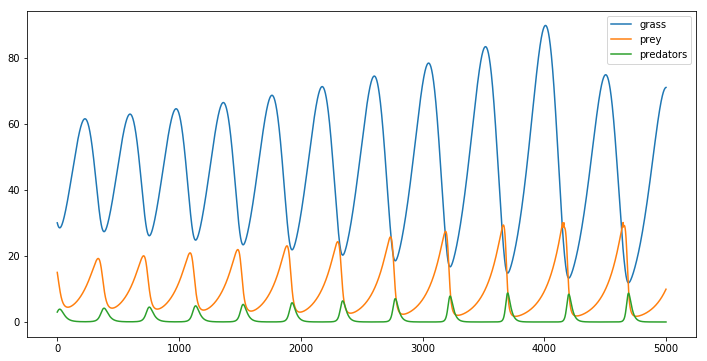

In [428]:
plt.figure(figsize=(12,6))
plt.plot(sim.get("grass_log"), label="grass")
plt.plot(sim.get("prey_log"), label="prey")
plt.plot(sim.get("pred_log"), label="predators")
plt.legend(loc='upper right')

In [477]:
np.max(sim.get("pred_log"))

8.76702761646925

Text(0.5, 0, 'Grass')

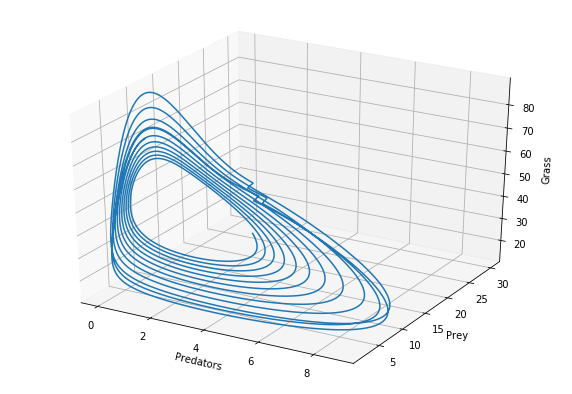

In [476]:
plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
zline = sim.get("grass_log")
xline = sim.get("pred_log")
yline = sim.get("prey_log")
ax.plot3D(xline, yline, zline)
ax.set_xlabel('Predators')
ax.set_ylabel('Prey')
ax.set_zlabel('Grass')